Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 5 - Regressão e Classificação com Modelos Lineares

Nome: Wilson Castello Branco Neto

Exemplo/Atividade 3: Classificação linear multivariada com dataset Iris (tipos de flores).

**Parte 1** - Exemplo

Leitura e apresentação do Dataset. Os quatro atributos independentes são valores contínuos que representam:
*   Sepal.Length - Comprimento da Sépala
*   Sepal.Width - Largura da Sépala
*   Petal.Length - Comprimento da Pétala
*   Petal.Width - Largura da Sépala

O último atributo representa a espécie da planta, que pode ser setosa (0), versicolor (1) ou virginica (2).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
print ('Formato dos dados independentes: ',X_iris.shape)
print ('Formato dos resultados (classe): ',y_iris.shape)


Formato dos dados independentes:  (150, 4)
Formato dos resultados (classe):  (150,)


Apresenta os dados dos atributos dependentes (apenas os 10 primeiros registros).

In [ ]:
X_iris[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Apresenta os dados do atributo independente (todos os registros).

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Exclui as colunas relacionadas às pétalas para criar um modelo com base apenas nos dois primeiros atributos. Esta exclusão é feita para fins didáticos, para tornar possível a visualização das classes em um gráfico com apenas duas dimensões. Em uma situação real, os atributos só devem ser excluídos caso se identifique que eles são irrelevantes para a definição do valor objetivo.

Seleciona apenas os 100 primeiros registros para tornar um problema de classificação binária, também para fins didáticos.

In [ ]:
X = X_iris[:100,:2]
y = y_iris[:100]

print(X[:10])
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Realiza a transformação dos atributos dependentes usando a normalização padrão (Z-Score).

In [ ]:
from sklearn.preprocessing import StandardScaler

tranform = StandardScaler()
X = tranform.fit_transform(X)

X[0:10]

array([[-0.5810659 ,  0.84183714],
       [-0.89430898, -0.2078351 ],
       [-1.20755205,  0.21203379],
       [-1.36417359,  0.00209934],
       [-0.73768744,  1.05177159],
       [-0.11120129,  1.68157493],
       [-1.36417359,  0.63190269],
       [-0.73768744,  0.63190269],
       [-1.67741667, -0.41776955],
       [-0.89430898,  0.00209934]])

Desenha os pontos do conjunto com o comprimento (eixo x) e a largura da sépala (eixo y), usando cores diferentes para cada tipo de flor:
1.   setosa (0) - vermelho
2.   versicolor (1) - amarelo


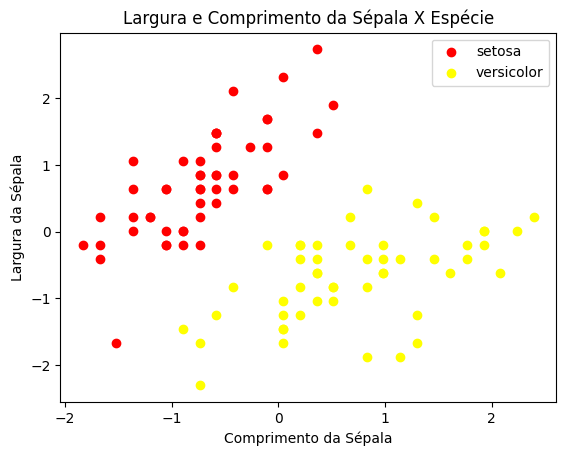

In [ ]:
px = X[:, 0][y == 0]
py = X[:, 1][y == 0]
plt.scatter(px, py, c='red')

px = X[:, 0][y == 1]
py = X[:, 1][y == 1]
plt.scatter(px, py, c='yellow')

plt.title('Largura e Comprimento da Sépala X Espécie')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
plt.show()

Altera a classe de quatro exemplos para que existam valores errados e apresenta o gráfico novamente.

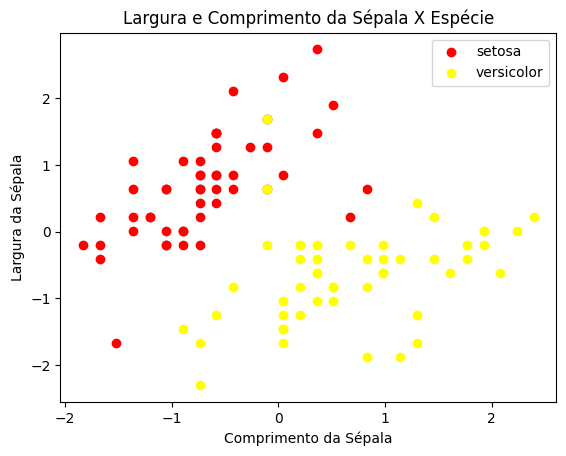

In [ ]:
y[5]=1
y[20]=1
y[70]=0
y[85]=0

px = X[:, 0][y == 0]
py = X[:, 1][y == 0]
plt.scatter(px, py, c='red')

px = X[:, 0][y == 1]
py = X[:, 1][y == 1]
plt.scatter(px, py, c='yellow')

plt.title('Largura e Comprimento da Sépala X Espécie')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
plt.show()


Divide o dataset em dois conjuntos, um para treinamento e outro para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

print('Formato dos dados de treinamento')
print (X_train.shape, y_train.shape)

print('Formato dos dados de teste')
print (X_test.shape, y_test.shape)


Formato dos dados de treinamento
(75, 2) (75,)
Formato dos dados de teste
(25, 2) (25,)


Cria e treina um modelo de classificação linear rígido. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

modelo = Perceptron(random_state=0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[ 1.72283691 -3.35895118]]
Coeficiente w0 das três retas
[0.]
Acurácia do modelo
0.96


Apresenta os pontos e o classificador linear rígido gerado para o conjunto de treinamento.



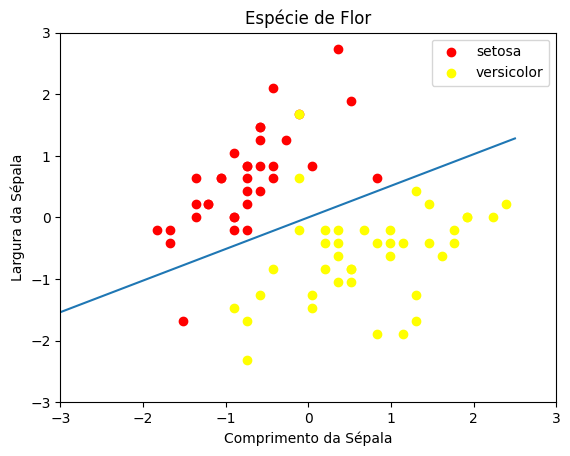

In [ ]:
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

plt.title('Espécie de Flor')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
xs = np.arange(-3,3,0.5)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
plt.show()

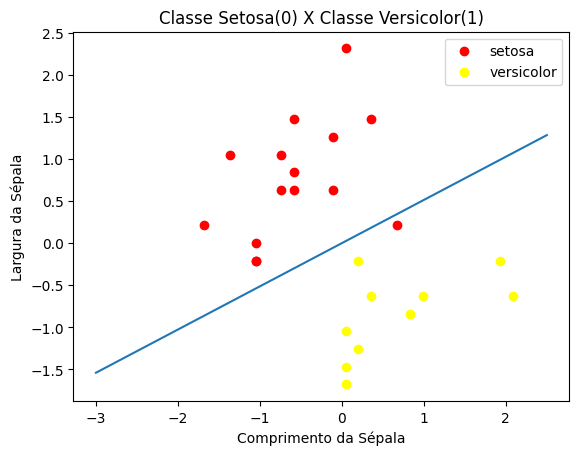

In [ ]:
px = X_test[:, 0][y_test == 0]
py = X_test[:, 1][y_test == 0]
plt.scatter(px, py, c='red')

px = X_test[:, 0][y_test == 1]
py = X_test[:, 1][y_test == 1]
plt.scatter(px, py, c='yellow')

plt.title('Classe Setosa(0) X Classe Versicolor(1)')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)

plt.show()

Cria e treina um modelo de classificação linear estocástica. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

modelo = SGDClassifier(random_state=0)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[ 16.31474348 -14.9624333 ]]
Coeficiente w0 das três retas
[1.16150019]
Acurácia do modelo
0.96


Apresenta os pontos e o classificador linear estocástico gerado para o conjunto de treinamento.





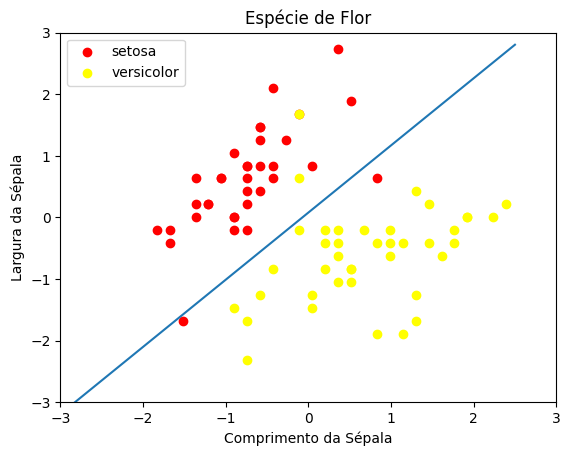

In [ ]:
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

plt.title('Espécie de Flor')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
xs = np.arange(-3,3,0.5)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
plt.show()

Apresenta os pontos e o classificador linear estocástico gerado para o conjunto de teste.

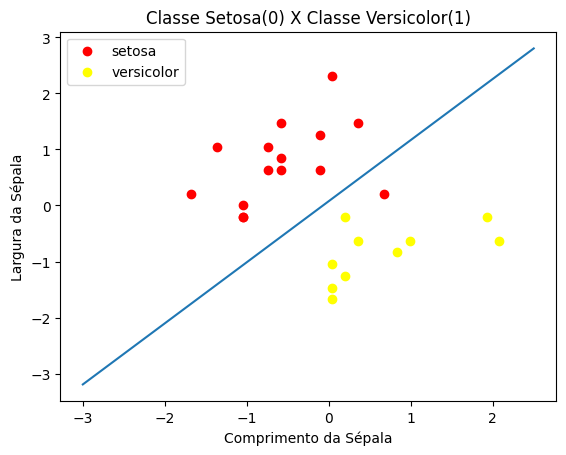

In [ ]:
px = X_test[:, 0][y_test == 0]
py = X_test[:, 1][y_test == 0]
plt.scatter(px, py, c='red')

px = X_test[:, 0][y_test == 1]
py = X_test[:, 1][y_test == 1]
plt.scatter(px, py, c='yellow')

plt.title('Classe Setosa(0) X Classe Versicolor(1)')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)

plt.show()

**Parte 2** - Atividade

Importe o Dataset novamente, apague as duas últimas colunas com as medidas das pétalas e transforme os dados usando a normalização z-score.

Apresente o diagrama de dispersão das três espécies de flores com cores diferentes.

Divida o dataset em conjunto de treinamento (75%) e teste (25%). Use random_state=42.

Treine o modelo rígido (perceptron) para classificar as três diferentes espécies de plantas e apresente os coeficientes das retas e a acurácia obtida.

Apresente o diagrama de dispersão para os dados de treinamento das três espécies de flores com cores diferentes e as três retas que os separam

Treine o modelo de classificação linear estocástica para classificar as três diferentes espécies de plantas e apresente os coeficientes das retas e a acurácia obtida.

Apresente o diagrama de dispersão para os dados de treinamento das três espécies de flores com cores diferentes e as três retas que os separam